In [2]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
from porousmedialab.batch import Batch
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
tend = 40 * 24 * 60 * 60
dt = 1 * 24 * 60 * 60

In [4]:
bl = Batch(tend, dt)

In [5]:
#Tous les init_C ont été changé en init_conc pour matcher avec la bibliothèque de fonctions

In [6]:
# ED
bl.add_species(element='POC', init_conc=12e-5)
bl.add_species(element='POC_2', init_conc=12e-2)
bl.add_species(element='POC_3', init_conc=12e-3)
bl.add_species(element='POC_4', init_conc=12e-4)
bl.add_species(element='POC_5', init_conc=12e-5)
bl.add_species(element='CO2', init_conc=2e-3)
bl.add_species(element='CO2_2', init_conc=2e-3)
bl.add_species(element='CO2_3', init_conc=2e-3)
bl.add_species(element='CO2_4', init_conc=2e-3)
bl.add_species(element='CO2_5', init_conc=2e-3)
bl.add_species(element='Fe2', init_conc=0)
bl.add_species(element='Fe2_2', init_conc=0)
bl.add_species(element='Fe2_3', init_conc=0)
bl.add_species(element='Fe2_4', init_conc=0)
bl.add_species(element='Fe2_5', init_conc=0)
bl.add_species(element='CH4', init_conc=0)
bl.add_species(element='CH4_2', init_conc=0)
bl.add_species(element='CH4_3', init_conc=0)
bl.add_species(element='CH4_4', init_conc=0)
bl.add_species(element='CH4_5', init_conc=0)

# EA
bl.add_species(element='NO3', init_conc=1.5e-3)
bl.add_species(element='NO3_2', init_conc=1.5e-3)
bl.add_species(element='NO3_3', init_conc=1.5e-3)
bl.add_species(element='NO3_4', init_conc=1.5e-3)
bl.add_species(element='NO3_5', init_conc=1.5e-3)
bl.add_species(element='Fe3', init_conc=17.8e-3)
bl.add_species(element='Fe3_2', init_conc=17.8e-3)
bl.add_species(element='Fe3_3', init_conc=17.8e-3)
bl.add_species(element='Fe3_4', init_conc=17.8e-3)
bl.add_species(element='Fe3_5', init_conc=17.8e-3)
bl.add_species(element='SO4', init_conc=1.7e-3)
bl.add_species(element='SO4_2', init_conc=1.7e-3)
bl.add_species(element='SO4_3', init_conc=1.7e-3)
bl.add_species(element='SO4_4', init_conc=1.7e-3)
bl.add_species(element='SO4_5', init_conc=1.7e-3)

# Henry law equilibrium:
bl.add_species(element='CH4g', init_conc=0)
bl.add_partition_equilibrium('CH4', 'CH4g', 1.4)
bl.add_species(element='CH4g_2', init_conc=0)
bl.add_partition_equilibrium('CH4_2', 'CH4g_2', 1.4)
bl.add_species(element='CH4g_3', init_conc=0)
bl.add_partition_equilibrium('CH4_3', 'CH4g_3', 1.4)
bl.add_species(element='CH4g_4', init_conc=0)
bl.add_partition_equilibrium('CH4_4', 'CH4g_4', 1.4)
bl.add_species(element='CH4g_5', init_conc=0)
bl.add_partition_equilibrium('CH4_5', 'CH4g_5', 1.4)

In [7]:
bl.constants['Km_NO3'] = 0.001e-3
bl.constants['Km_Fe3_surf'] = 2e-3
bl.constants['Km_SO4'] = 0.3e-4
bl.constants['k1'] = 0.1 / 24 / 60 / 60
bl.constants['SA'] = 600
bl.constants['ro_min'] = 3.84e-6
bl.constants['MW_Fe3'] = 106.8
bl.constants['Fe3_init'] = 17.8e-3

In [8]:
bl.rates['r_NO3'] = 'k1 * POC * NO3 / (Km_NO3 + NO3)'
bl.rates['r_NO3_2'] = 'k1 * POC_2 * NO3_2 / (Km_NO3 + NO3_2)'
bl.rates['r_NO3_3'] = 'k1 * POC_3 * NO3_3 / (Km_NO3 + NO3_3)'
bl.rates['r_NO3_4'] = 'k1 * POC_4 * NO3_4 / (Km_NO3 + NO3_4)'
bl.rates['r_NO3_5'] = 'k1 * POC_5 * NO3_5 / (Km_NO3 + NO3_5)'
bl.rates['r_Fe3'] = 'k1 * POC *Fe3 / (Km_Fe3_surf +Fe3) * Km_NO3 / (Km_NO3 + NO3)'
bl.rates['r_Fe3_2'] = 'k1 * POC_2 *Fe3_2 / (Km_Fe3_surf +Fe3_2) * Km_NO3 / (Km_NO3 + NO3_2)'
bl.rates['r_Fe3_3'] = 'k1 * POC_3 *Fe3_3 / (Km_Fe3_surf +Fe3_3) * Km_NO3 / (Km_NO3 + NO3_3)'
bl.rates['r_Fe3_4'] = 'k1 * POC_4 *Fe3_4 / (Km_Fe3_surf +Fe3_4) * Km_NO3 / (Km_NO3 + NO3_4)'
bl.rates['r_Fe3_5'] = 'k1 * POC_5 *Fe3_5 / (Km_Fe3_surf +Fe3_5) * Km_NO3 / (Km_NO3 + NO3_5)'
bl.rates['r_SO4'] = 'k1 * POC * SO4 / (Km_SO4 + SO4) * Km_Fe3_surf / (Km_Fe3_surf +Fe3) * Km_NO3 / (Km_NO3 + NO3)'
bl.rates['r_SO4_2'] = 'k1 * POC_2 * SO4_2 / (Km_SO4 + SO4_2) * Km_Fe3_surf / (Km_Fe3_surf +Fe3_2) * Km_NO3 / (Km_NO3 + NO3_2)'
bl.rates['r_SO4_3'] = 'k1 * POC_3 * SO4_3 / (Km_SO4 + SO4_3) * Km_Fe3_surf / (Km_Fe3_surf +Fe3_3) * Km_NO3 / (Km_NO3 + NO3_3)'
bl.rates['r_SO4_4'] = 'k1 * POC_4 * SO4_4 / (Km_SO4 + SO4_4) * Km_Fe3_surf / (Km_Fe3_surf +Fe3_4) * Km_NO3 / (Km_NO3 + NO3_4)'
bl.rates['r_SO4_5'] = 'k1 * POC_5 * SO4_5 / (Km_SO4 + SO4_5) * Km_Fe3_surf / (Km_Fe3_surf +Fe3_5) * Km_NO3 / (Km_NO3 + NO3_5)'
bl.rates['r_CH4'] = 'k1 * POC * Km_SO4 / (Km_SO4 + SO4) * Km_Fe3_surf / (Km_Fe3_surf +Fe3) * Km_NO3 / (Km_NO3 + NO3)'
bl.rates['r_CH4_2'] = 'k1 * POC_2 * Km_SO4 / (Km_SO4 + SO4_2) * Km_Fe3_surf / (Km_Fe3_surf +Fe3_2) * Km_NO3 / (Km_NO3 + NO3_2)'
bl.rates['r_CH4_3'] = 'k1 * POC_3 * Km_SO4 / (Km_SO4 + SO4_3) * Km_Fe3_surf / (Km_Fe3_surf +Fe3_3) * Km_NO3 / (Km_NO3 + NO3_3)'
bl.rates['r_CH4_4'] = 'k1 * POC_4 * Km_SO4 / (Km_SO4 + SO4_4) * Km_Fe3_surf / (Km_Fe3_surf +Fe3_4) * Km_NO3 / (Km_NO3 + NO3_4)'
bl.rates['r_CH4_5'] = 'k1 * POC_5 * Km_SO4 / (Km_SO4 + SO4_5) * Km_Fe3_surf / (Km_Fe3_surf +Fe3_5) * Km_NO3 / (Km_NO3 + NO3_5)'

In [9]:
bl.dcdt['POC'] = '- r_NO3 - r_Fe3 - r_SO4 - r_CH4'
bl.dcdt['POC_2'] = '- r_NO3_2 - r_Fe3_2 - r_SO4_2 - r_CH4_2'
bl.dcdt['POC_3'] = '- r_NO3_3 - r_Fe3_3 - r_SO4_3 - r_CH4_3'
bl.dcdt['POC_4'] = '- r_NO3_4 - r_Fe3_4 - r_SO4_4 - r_CH4_4'
bl.dcdt['POC_5'] = '- r_NO3_5 - r_Fe3_5 - r_SO4_5 - r_CH4_5'
bl.dcdt['NO3'] = '- 4 / 5 * r_NO3'
bl.dcdt['NO3_2'] = '- 4 / 5 * r_NO3_2'
bl.dcdt['NO3_3'] = '- 4 / 5 * r_NO3_3'
bl.dcdt['NO3_4'] = '- 4 / 5 * r_NO3_4'
bl.dcdt['NO3_5'] = '- 4 / 5 * r_NO3_5'
bl.dcdt['Fe3'] = '- 4 * r_Fe3'
bl.dcdt['Fe3_2'] = '- 4 * r_Fe3_2'
bl.dcdt['Fe3_3'] = '- 4 * r_Fe3_3'
bl.dcdt['Fe3_4'] = '- 4 * r_Fe3_4'
bl.dcdt['Fe3_5'] = '- 4 * r_Fe3_5'
bl.dcdt['Fe2'] = '4 * r_Fe3'
bl.dcdt['Fe2_2'] = '4 * r_Fe3_2'
bl.dcdt['Fe2_3'] = '4 * r_Fe3_3'
bl.dcdt['Fe2_4'] = '4 * r_Fe3_4'
bl.dcdt['Fe2_5'] = '4 * r_Fe3_5'
bl.dcdt['SO4'] = '- 1 / 2 * r_SO4'
bl.dcdt['SO4_2'] = '- 1 / 2 * r_SO4_2'
bl.dcdt['SO4_3'] = '- 1 / 2 * r_SO4_3'
bl.dcdt['SO4_4'] = '- 1 / 2 * r_SO4_4'
bl.dcdt['SO4_5'] = '- 1 / 2 * r_SO4_5'
bl.dcdt['CO2'] = '1 * (r_NO3 + r_Fe3 + r_SO4)'
bl.dcdt['CO2_2'] = '1 * (r_NO3_2 + r_Fe3_2 + r_SO4_2)'
bl.dcdt['CO2_3'] = '1 * (r_NO3_3 + r_Fe3_3 + r_SO4_3)'
bl.dcdt['CO2_4'] = '1 * (r_NO3_4 + r_Fe3_4 + r_SO4_4)'
bl.dcdt['CO2_5'] = '1 * (r_NO3_5 + r_Fe3_5 + r_SO4_5)'
bl.dcdt['CH4'] = '1 / 2 * r_CH4'
bl.dcdt['CH4_2'] = '1 / 2 * r_CH4_2'
bl.dcdt['CH4_3'] = '1 / 2 * r_CH4_3'
bl.dcdt['CH4_4'] = '1 / 2 * r_CH4_4'
bl.dcdt['CH4_5'] = '1 / 2 * r_CH4_5'

In [12]:
bl.solve()

Simulation started:
	 2018-04-14 12:24:29


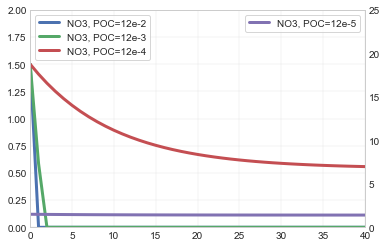

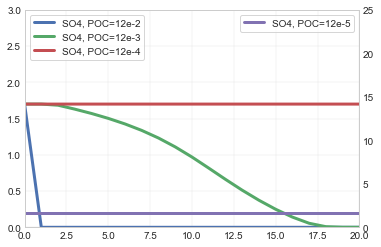

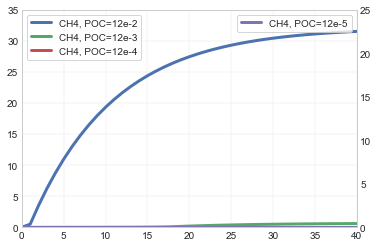

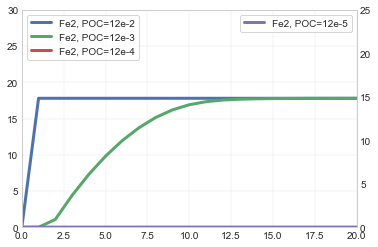

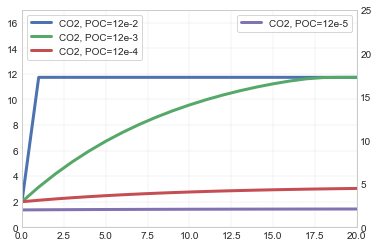

In [21]:
# J'ai retiré les données de bases pour garder uniquement la courbe


# Graphique #1, NO3
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.NO3_2.concentration[0], c=sns.color_palette("deep", 10)[0], lw=3, label='NO3, POC=12e-2')
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.NO3_3.concentration[0], c=sns.color_palette("deep", 10)[1], lw=3, label='NO3, POC=12e-3')
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.NO3_4.concentration[0], c=sns.color_palette("deep", 10)[2], lw=3, label='NO3, POC=12e-4')
ax2.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.NO3_5.concentration[0], c=sns.color_palette("deep", 10)[3], lw=3, label='NO3, POC=12e-5')
ax2.grid(False)
ax1.grid(lw=0.2)
ax1.set_ylim(0, 2)
ax1.set_xlim(0, 40)
ax2.set_ylim(0, 25)
ax1.legend(frameon=1, loc=2)
ax2.legend(frameon=1, loc=1)

#Graphique #2,SO4
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.SO4_2.concentration[0], c=sns.color_palette("deep", 10)[0], lw=3, label='SO4, POC=12e-2')
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.SO4_3.concentration[0], c=sns.color_palette("deep", 10)[1], lw=3, label='SO4, POC=12e-3')
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.SO4_4.concentration[0], c=sns.color_palette("deep", 10)[2], lw=3, label='SO4, POC=12e-4')
ax2.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.SO4_5.concentration[0], c=sns.color_palette("deep", 10)[3], lw=3, label='SO4, POC=12e-5')
ax2.grid(False)
ax1.grid(lw=0.2)
ax1.set_ylim(0, 3)
ax1.set_xlim(0, 20)
ax2.set_ylim(0, 25)
ax1.legend(frameon=1, loc=2)
ax2.legend(frameon=1, loc=1)



# Graphique #3, CH4
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.CH4_2.concentration[0], c=sns.color_palette("deep", 10)[0], lw=3, label='CH4, POC=12e-2')
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.CH4_3.concentration[0], c=sns.color_palette("deep", 10)[1], lw=3, label='CH4, POC=12e-3')
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.CH4_4.concentration[0], c=sns.color_palette("deep", 10)[2], lw=3, label='CH4, POC=12e-4')
ax2.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.CH4_5.concentration[0], c=sns.color_palette("deep", 10)[3], lw=3, label='CH4, POC=12e-5')
ax2.grid(False)
ax1.grid(lw=0.2)
ax1.set_ylim(0, 35)
ax1.set_xlim(0, 40)
ax2.set_ylim(0, 25)
ax1.legend(frameon=1, loc=2)
ax2.legend(frameon=1, loc=1)

# Graphique #4, Fe2
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.Fe2_2.concentration[0], c=sns.color_palette("deep", 10)[0], lw=3, label='Fe2, POC=12e-2')
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.Fe2_3.concentration[0], c=sns.color_palette("deep", 10)[1], lw=3, label='Fe2, POC=12e-3')
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.Fe2_4.concentration[0], c=sns.color_palette("deep", 10)[2], lw=3, label='Fe2, POC=12e-4')
ax2.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.Fe2_5.concentration[0], c=sns.color_palette("deep", 10)[3], lw=3, label='Fe2, POC=12e-5')
ax2.grid(False)
ax1.grid(lw=0.2)
ax1.set_ylim(0, 30)
ax1.set_xlim(0, 20)
ax2.set_ylim(0, 25)
ax1.legend(frameon=1, loc=2)
ax2.legend(frameon=1, loc=1)

# Graphique #5, CO2
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.CO2_2.concentration[0], c=sns.color_palette("deep", 10)[0], lw=3, label='CO2, POC=12e-2')
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.CO2_3.concentration[0], c=sns.color_palette("deep", 10)[1], lw=3, label='CO2, POC=12e-3')
ax1.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.CO2_4.concentration[0], c=sns.color_palette("deep", 10)[2], lw=3, label='CO2, POC=12e-4')
ax2.plot(bl.time*1 / 24 / 60 / 60, 1e+3*bl.CO2_5.concentration[0], c=sns.color_palette("deep", 10)[3], lw=3, label='CO2, POC=12e-5')
ax2.grid(False)
ax1.grid(lw=0.2)
ax1.set_ylim(0, 17)
ax1.set_xlim(0, 20)
ax2.set_ylim(0, 25)
ax1.legend(frameon=1, loc=2)
ax2.legend(frameon=1, loc=1)
